In [1]:
from PyKomoran import *

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [3]:
import csv
f = open('result_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

 '착한 넘은 끝이 없이 빽업이 되야~착한 사람이 당하고만 사는 세상인 줄 알았는데.. 그렇네요 세상에 착한 넘들 천지네유 ㅠㅠ 알려줘서 고맙습니다', '0']
['999', '진짜재밌었어요', '0']
['1000', '진짜저 시간없어서 드라마안보는데 이건 매주본방사수했다. 술마시다가도 이거보면서먹었다.  진짜 작가가 천재인것같다. 모든장면이다이어져....', '0']
['1001', '진짜진짜재미있게봤어요ㅎㅎ울다웃다가또울다가웃고ㅋㅋ', '0']
['1002', '진짜한회한회마다눈물안흘린회차가없었네요 ㅜㅠ앞으로 이 드라마작가분 작품완전눈여겨볼듯 ㅜㅠ동백꽃이피워서행복했습니다ㅜㅠ', '0']
['1003', '진짜, 드라마 참 따뜻하다~~고마워요♡♡♡', '0']
['1004', '진짜..역대급 탑5안에 드라마였음..1회부터 본게 뿌듯하다', '0']
['1005', '진짜뻥안치고 펑펑울었다..진짜 내인생 최고드라마였다..', '0']
['1006', '진짜 최고네요!!', '0']
['1007', '진짜 최고의 드라마', '0']
['1008', '진짜 최고의 드라마 정말 마지막까지 최고였어요!!', '0']
['1009', '진짜 최고의 힐링 드라마였습니다ㅠㅠㅠ', '0']
['1010', '진짜 최고ㅠㅠ 조연하나하나가 다 소중해 소중해 마지막화에 반전에 감동에 웃음에 행복에 사랑까지........ 감사합니다', '0']
['1011', '진짜 특별한 드라마였다.. 잊지 못할것 같음 ㅠㅠ', '0']
['1012', '진짜 좋은드라마였다.. 정말 최고로 좋은 드라마', '0']
['1013', '진짜 최고 드라마~작가님, 배우님들 감사합니다', '0']
['1014', '진짜 최고 였어요~~~넘 멋졌다^^', '0']
['1015', '진짜 재밌게 봤어요. 작가님 짱!', '0']
['1016', '진짜 제 인생 드라마입니다...', '0']
['1017', '진짜 잘봤던 드라마~~감사합니다!!', '0']
['1018', '진짜 조연들도 완벽했고 강하늘 공

In [4]:
dic = pd.read_csv('result_file.csv',encoding = 'UTF-8-sig')
dic[:5]

,0,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다,1
0,1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
1,2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
2,3,정신분열 잼 ㅋㅋㅋ,1
3,4,실력에비해 오래갔다,1
4,5,거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...,1


In [5]:
dic.columns = ['0', 'comment', 'label']
comment_data = dic[['comment','label']]
print(len(comment_data)) # 댓글 개수 출력

20555


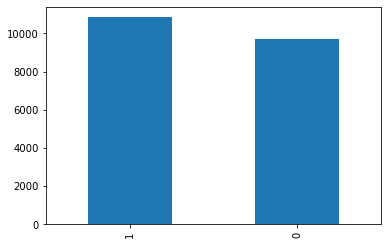

In [6]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [7]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 20555
rating개수: 20555


# 불용어 제거 및 토큰화

In [8]:
#한글과 공백을 제외하고 모두 제거
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다', '거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 ']


In [9]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

습니다 
작가가 대라는게 놀랍다
작가가 대사를 모두 명대사로 아주 대단하세요 작가님이 최고네요 누구신지는 모르겠지만
작가가 참 이쁘게 글을 쓰시네요따스해지는 드라마였어요감사합니다
작가님 연기자분들 모두모두 감사했습니다 
작가님 계속 파이팅
작가님 대단하셔오 다음 작품 기대 할게요 그리고 여기 출연하신분들 믿고 보는 배우님들 
작가님 마지막도 넘최고 였고 흥식이 와 정말 소름키치게 연기 잘하더라 
작가님 사람들에 대한 따뜻한 시선 참좋았답니다 세상은 착한 사람들이 이끌어가는게 맞는거죠
작가님 감사합니다 두달동안 행복했어요 
작가님 감사합니다 해피엔드로 마무리지어주셔서 보는내내 행복했어요
작가님 감사합니다 대한민국 사람들 가슴깊은곳에 자리잡은 그 깊은 정을 다시 한번 일깨워준 것 같습니다 극소수인 나쁜 사람들때문에 개개인 스스로가 감정이 매말라가고 냉정해지는 이 시점에서 아 우리는 원래 이렇게 정이 많은 민족이였었어 하고 다시금 알려 주시는 것 같습니다 결국은 쪽수다 다만 왕따와 조폭등 나쁜일에는 쪽수가 해당되서는 안되겠지요 작가님 대사 하나하나가 정말 주옥같고 되새기게 되네요 간만에 정말 간만에 주말연속극같은 수목 드라마를 만나게 된 것 같아요 년에 한번 나올까 말까네요 매번 바람 불륜 살인 친자확인
작가님 감사합니다 이런드라마 보게해주셔서 
작가님 감사합니다 기적같은 해피엔딩이라 눈물머금고 미소지으며 그리고 박수치며 봤어요 정말 좋은 드라마 였어요 
작가님 감사합니다 따뜻해요
작가님 고맙습니다 늘 건강하세요 
작가님 대단하시고 공효진언니가 까불이직접 잡는거 대박 좋은배우들 다 좋다
작가님 대사하나하나가 진짜 최고
작가님 도대체 뭐야 어케 장면마다 명대사들이냐 작가님 미쳤어 
작가님 이런 드라마 하나만 더 만들어 줘유ㅜㅜ
작가님 동백이 엄마 살려줘서 감사해요 마지막회가 이리 재미지고 감동적인 드라마는 처음봐유 동백이 땜시 행복했어요
작가님 두달여동안 행복했어요 고맙습니다 
작가님 드라마보는 내내 행복했습니다 이런 좋은 작품 써주셔서 감사합니다ㅜㅜ감독님 스탭분들 

In [10]:
#불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [11]:
kmr = Komoran("EXP")

In [12]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = kmr.morphes(sentence) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [13]:
print(X_token[:3])

[['마디', '인성'], ['개념', '없어', '원래', '호감', '행동', '말투'], ['정신', '분열']]


# 정수 인코딩 수행

In [14]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [15]:
print(X_token[:3])

[[852, 30], [216, 371, 197, 43, 149, 79], [16, 1922]]


In [16]:
word_to_index = tokenizer.word_index

In [17]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 6770


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 57
리뷰의 평균 길이 : 3.282364388226709


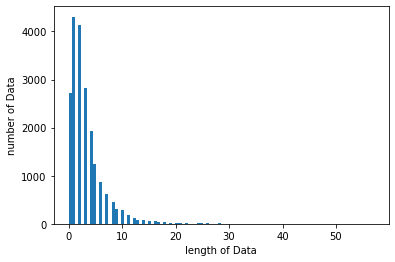

In [18]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [19]:
max_len = 57
X_data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", X_data.shape)

data shape:  (20555, 57)


In [20]:
y_data = np.array(y_data).reshape(-1, 1)

In [21]:
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  852
    30]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0  216  371  197   43  149
    79]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   16
  1922]]
[[1]
 [1]
 [1]]


# 데이터 분리

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [24]:
print(X_train[:3])
print(y_train[:3]) 

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   931]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 1345 1346  541 1346
    76]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  258
   142]]
[[0]
 [1]
 [1]]


# activation = ReLU 추가(loss: 0.2971 - acc: 0.8434)

In [25]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         3500000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,642,677
Trainable params: 3,642,677
Non-trainable params: 0
______________________________________________

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split = 0.2)

Train on 11510 samples, validate on 2878 samples
Epoch 1/5
11510/11510 [==============================] - 81s 7ms/sample - loss: 0.4371 - acc: 0.7711 - val_loss: 0.2975 - val_acc: 0.8607
Epoch 2/5
11510/11510 [==============================] - 86s 7ms/sample - loss: 0.2475 - acc: 0.8759 - val_loss: 0.2989 - val_acc: 0.8565
Epoch 3/5
11510/11510 [==============================] - 66s 6ms/sample - loss: 0.2102 - acc: 0.8911 - val_loss: 0.3202 - val_acc: 0.8541
Epoch 4/5
11510/11510 [==============================] - 62s 5ms/sample - loss: 0.1966 - acc: 0.8920 - val_loss: 0.3500 - val_acc: 0.8534
Epoch 5/5
11510/11510 [==============================] - 61s 5ms/sample - loss: 0.1867 - acc: 0.8981 - val_loss: 0.3653 - val_acc: 0.8346


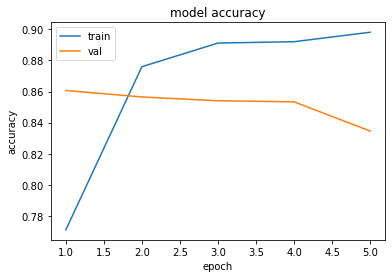

In [28]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

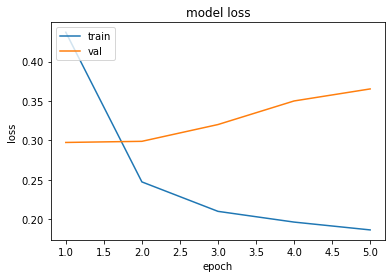

In [29]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)